## /collections/{collection_id}/processes/area:aggregate-space


In [1]:
import xarray as xr
import requests
from IPython.display import GeoJSON
from shapely.geometry import mapping, box 
import numpy as np

In [2]:
dapa_endpoint = 'http://0.0.0.0:8000'

### Get the DAPA collections

In [3]:
query = '{}/collections'.format(dapa_endpoint)

In [4]:
r = requests.get(query)

In [5]:
r.status_code

200

In [6]:
r.json()

{'collections': [{'id': 'S5P-NO2',
   'title': 'Sentinel-5P NO2 column number density over Europe',
   'extent': {'spatial': {'bbox': [[-13, 57, 33, 33]], 'crs': 'EPSG:4326'},
    'temporal': {'interval': [['2018-05-01T00:00:00/2020-04-01T00:00:00']]}}}]}

In [7]:
collection_bbox = r.json()['collections'][0]['extent']['spatial']['bbox']

In [8]:
collection_bbox

[[-13, 57, 33, 33]]

In [9]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*collection_bbox[0]))}])

<IPython.display.GeoJSON object>

In [10]:
collection = r.json()['collections'][0]['id']

collection

'S5P-NO2'

### Get the collection variables

In [11]:
query = '{}/collections/{}/variables'.format(dapa_endpoint, collection)

In [12]:
r = requests.get(query)

In [13]:
r.status_code

200

In [14]:
variables = r.json()

variables

{'variables': [{'id': 'tropospheric_NO2_column_number_density',
   'title': 'Troposheric NO2 column number density',
   'uom': 'umol/m2'}]}

In [15]:
variable = variables['variables'][0]['id']

variable

'tropospheric_NO2_column_number_density'

### /collections/{collection_id}/processes/area:aggregate-space

In [16]:
location = 'Paris, France'

In [17]:
query = '{}/geothesaurus'.format(dapa_endpoint)

In [18]:
params = {'location': location}

In [19]:
r = requests.get(query, params=params)

In [20]:
r.status_code

200

In [21]:
GeoJSON(r.json())

<IPython.display.GeoJSON object>

In [22]:
query = '{}/collections/{}/processes/area:aggregate-space'.format(dapa_endpoint,
                                                                  collection)

query

'http://0.0.0.0:8000/collections/S5P-NO2/processes/area:aggregate-space'

In [23]:
params = {'location': location,
          'variable': variable,
          'function': 'mean'}

Submit the request:

In [24]:
r = requests.get(query, params=params)

Get the HTTP exit code:

In [25]:
r.status_code

200

Print the response

In [26]:
r.json()

{'dims': ['date'],
 'attrs': {},
 'data': [100.1324234008789,
  108.42546844482422,
  104.51811218261719,
  100.24728393554688,
  147.37747192382812,
  175.85682678222656,
  134.60430908203125,
  130.3466339111328,
  183.80581665039062,
  245.13583374023438,
  163.27557373046875,
  157.80690002441406,
  111.63142395019531,
  87.11934661865234,
  120.63220977783203,
  135.62774658203125,
  103.2400131225586,
  67.60403442382812,
  126.24264526367188,
  110.4811782836914,
  130.93609619140625,
  84.22869110107422,
  75.42339324951172,
  71.36090850830078],
 'coords': {'date': {'dims': ['date'],
   'attrs': {},
   'data': ['2018-05-01T00:00:00',
    '2018-06-01T00:00:00',
    '2018-07-01T00:00:00',
    '2018-08-01T00:00:00',
    '2018-09-01T00:00:00',
    '2018-10-01T00:00:00',
    '2018-11-01T00:00:00',
    '2018-12-01T00:00:00',
    '2019-01-01T00:00:00',
    '2019-02-01T00:00:00',
    '2019-03-01T00:00:00',
    '2019-04-01T00:00:00',
    '2019-05-01T00:00:00',
    '2019-06-01T00:00:00'

In [27]:
xr.DataArray.from_dict(r.json())

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24)>
array([100.1324234 , 108.42546844, 104.51811218, 100.24728394,
       147.37747192, 175.85682678, 134.60430908, 130.34663391,
       183.80581665, 245.13583374, 163.27557373, 157.80690002,
       111.63142395,  87.11934662, 120.63220978, 135.62774658,
       103.24001312,  67.60403442, 126.24264526, 110.48117828,
       130.93609619,  84.2286911 ,  75.42339325,  71.36090851])
Coordinates:
  * date     (date) <U19 '2018-05-01T00:00:00' ... '2020-04-01T00:00:00'

In [28]:
area_space_extracted = xr.DataArray.from_dict(r.json()).assign_coords(date=[np.datetime64(d) for d in xr.DataArray.from_dict(r.json())['date'].values])

In [29]:
area_space_extracted

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24)>
array([100.1324234 , 108.42546844, 104.51811218, 100.24728394,
       147.37747192, 175.85682678, 134.60430908, 130.34663391,
       183.80581665, 245.13583374, 163.27557373, 157.80690002,
       111.63142395,  87.11934662, 120.63220978, 135.62774658,
       103.24001312,  67.60403442, 126.24264526, 110.48117828,
       130.93609619,  84.2286911 ,  75.42339325,  71.36090851])
Coordinates:
  * date     (date) datetime64[ns] 2018-05-01 2018-06-01 ... 2020-04-01

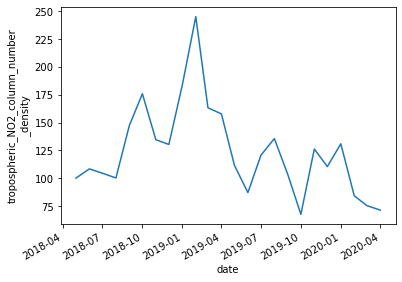

In [30]:
area_space_extracted.plot()